# Regreción Ejercicio Clase 2
## Nicolás Salusso - 10710

1) Implementación de $f(x)$.

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
% matplotlib inline


def f(x):
    return (0.01 * x) + (np.sin(x)**2) * (np.sin(4 * x)**2) * (0.5 * norm.pdf(x))

2) Obtención de las 500 muestras de la función $f(x)$ en el intervalo de $x=[-3 \leq x \leq 3]$.

In [2]:
x = np.linspace(-3, 3, 500)
y = f(x)

3) Teniendo dichas muestras, se grafica $f(x)$ en el intervalo de $x=[-3 \leq x \leq 3]$.

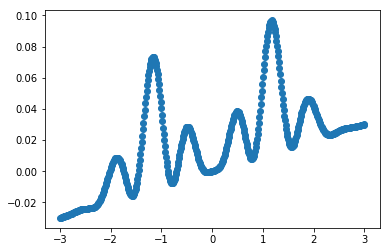

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.plot(x, y, 'o')

4) Se divide el conjunto total $(x,f(x))$ en un subconjunto de entrenamiento del 70% de las muestras y un subconjunto de test del 30% de las muestras.
* En primer lugar se genera la matriz que solicita como entrada scikit-learn para X.

In [4]:
X = x[:, np.newaxis]
X

array([[-3.        ],
       [-2.98797595],
       [-2.9759519 ],
       [-2.96392786],
       [-2.95190381],
       [-2.93987976],
       [-2.92785571],
       [-2.91583166],
       [-2.90380762],
       [-2.89178357],
       [-2.87975952],
       [-2.86773547],
       [-2.85571142],
       [-2.84368737],
       [-2.83166333],
       [-2.81963928],
       [-2.80761523],
       [-2.79559118],
       [-2.78356713],
       [-2.77154309],
       [-2.75951904],
       [-2.74749499],
       [-2.73547094],
       [-2.72344689],
       [-2.71142285],
       [-2.6993988 ],
       [-2.68737475],
       [-2.6753507 ],
       [-2.66332665],
       [-2.65130261],
       [-2.63927856],
       [-2.62725451],
       [-2.61523046],
       [-2.60320641],
       [-2.59118236],
       [-2.57915832],
       [-2.56713427],
       [-2.55511022],
       [-2.54308617],
       [-2.53106212],
       [-2.51903808],
       [-2.50701403],
       [-2.49498998],
       [-2.48296593],
       [-2.47094188],
       [-2

* En segundo lugar se definen los subconjuntos.

In [5]:
X_train = X[0:350]
X_test = X[350:500]
y_train = y[0:350]
y_test = y[350:500]

* En tercer lugar se implementa la siguiente línea de código para corroborar que lo realizado anteriormente este correcto. 

In [6]:
np.shape(X_train)

(350, 1)

5) Se usar el subconjunto de entrenamiento para entrenar un modelo de regresión lineal para aproximar $f(x)$ en el mencionado intervalo.

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

6) Se muestra gráficamente la regresión para el conjunto de entrenamiento y para el conjunto de test.
* Conjunto de entrenamiento:

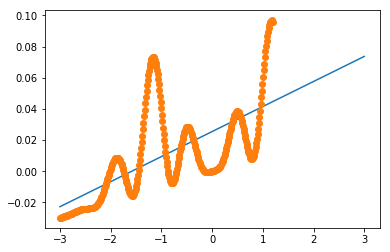

In [8]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_
plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o')

* Conjunto de test:

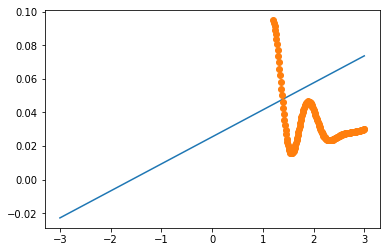

In [9]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_
plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_test, y_test, 'o')

7) Se imprime el error cuadrático medio para las predicciones sobre los $X$ de entrenamiento y los $X$ de test.
* Error cuadrático medio para las predicciones sobre los $X$ de entrenamiento:

In [10]:
from sklearn.metrics import mean_squared_error

y_pred_train = regressor.predict(X_train)
mean_squared_error(y_train, y_pred_train)

0.00051508308831770097

* Error cuadrático medio para las predicciones sobre los $X$ de test:

In [11]:
y_pred_test = regressor.predict(X_test)
mean_squared_error(y_test, y_pred_test)

0.0010926307695542973

Fin